<a href="https://colab.research.google.com/github/palak9/Stock-Price-Prediction/blob/master/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importing the required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import io
import pandas as pd
from google.colab import files

In [11]:
upload_my_dataset = files.upload()

Saving AxisBank.csv to AxisBank (1).csv


In [12]:
#DATA COLLECTION STAGE
#Reading the dataset using Pandas

dataset = pd.read_csv(io.BytesIO(upload_my_dataset['AxisBank.csv']))

In [13]:
#Exploring the DATASET

#Summary of Dataset using .info() 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5097 non-null   object 
 1   Symbol              5097 non-null   object 
 2   Series              5097 non-null   object 
 3   Prev Close          5097 non-null   float64
 4   Open                5097 non-null   float64
 5   High                5097 non-null   float64
 6   Low                 5097 non-null   float64
 7   Last                5097 non-null   float64
 8   Close               5097 non-null   float64
 9   VWAP                5097 non-null   float64
 10  Volume              5097 non-null   int64  
 11  Turnover            5097 non-null   float64
 12  Trades              2247 non-null   float64
 13  Deliverable Volume  4588 non-null   float64
 14  %Deliverble         4588 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 597.4

In [14]:
#Statistical insights of the data
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5.097000e+03,5.097000e+03,2247.000000,4.588000e+03,4588.000000
mean,586.147361,586.867922,596.849137,575.910408,586.231244,586.222297,586.428050,3.766281e+06,2.322832e+14,109448.384068,1.789447e+06,0.475305
std,444.933212,444.823867,451.385844,438.207726,444.829537,444.870793,444.832632,6.968986e+06,3.441074e+14,88599.003952,3.119631e+06,0.159618
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000,5.809000e+03,0.075000
25%,204.450000,205.000000,209.400000,199.050000,205.950000,205.150000,204.470000,2.604650e+05,4.849573e+12,59955.500000,2.395358e+05,0.361075
50%,517.550000,518.250000,525.650000,510.000000,517.700000,517.550000,517.760000,1.492124e+06,1.549589e+14,87305.000000,7.158830e+05,0.469250
75%,918.850000,918.950000,936.900000,901.000000,919.000000,918.850000,918.160000,4.794343e+06,3.180481e+14,129907.500000,2.267821e+06,0.579850
max,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000,9.490116e+07,0.983000


In [15]:
#Total no. of rows and columns in the dataset
dataset.shape

(5097, 15)

In [16]:
#First five dataframes in the dataset
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [17]:
#Datatypes of the all the columns present in the dataset, so as to get an clear idea.
dataset.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [18]:
#Converting the date column into Timestamp i.e datetime64[ns] format.

dataset['Date'] = pd.to_datetime(dataset['Date'])
print(dataset['Date'].dtype)

datetime64[ns]


In [19]:
#just to check the converted data type (new data type of column 'Date'). 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5097 non-null   datetime64[ns]
 1   Symbol              5097 non-null   object        
 2   Series              5097 non-null   object        
 3   Prev Close          5097 non-null   float64       
 4   Open                5097 non-null   float64       
 5   High                5097 non-null   float64       
 6   Low                 5097 non-null   float64       
 7   Last                5097 non-null   float64       
 8   Close               5097 non-null   float64       
 9   VWAP                5097 non-null   float64       
 10  Volume              5097 non-null   int64         
 11  Turnover            5097 non-null   float64       
 12  Trades              2247 non-null   float64       
 13  Deliverable Volume  4588 non-null   float64     

In [20]:
dataset = dataset.set_index('Date')
dataset.head(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.7,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.5,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.5,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN


In [21]:
dataset.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Date', length=5097, freq=None)

In [28]:
dataset['Year'] = dataset.index.year
dataset['Month'] = dataset.index.month

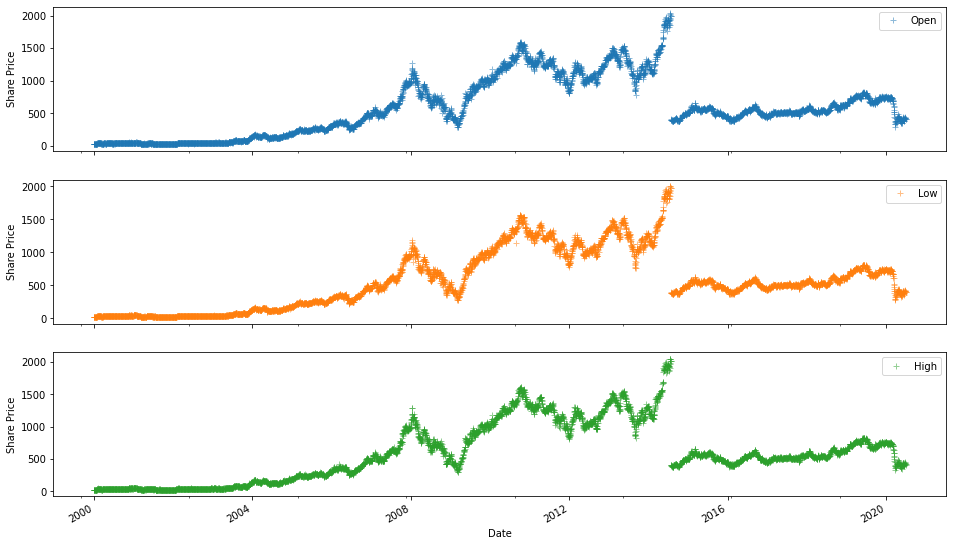

In [29]:
cols_plot = ['Open','Low','High']
axes = dataset[cols_plot].plot(marker='+', alpha=0.5, linestyle='None', figsize=(16, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Share Price')

Text(0.5, 0, 'Months')

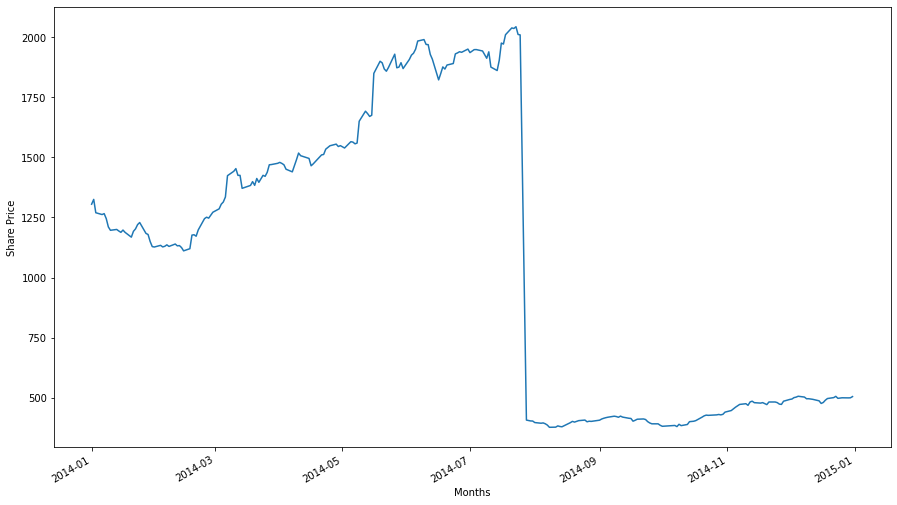

In [30]:
ax = dataset.loc['2014', 'High'].plot(figsize = (15, 9))
ax.set_ylabel('Share Price')
ax.set_xlabel('Months')

Text(0.5, 0, 'Months')

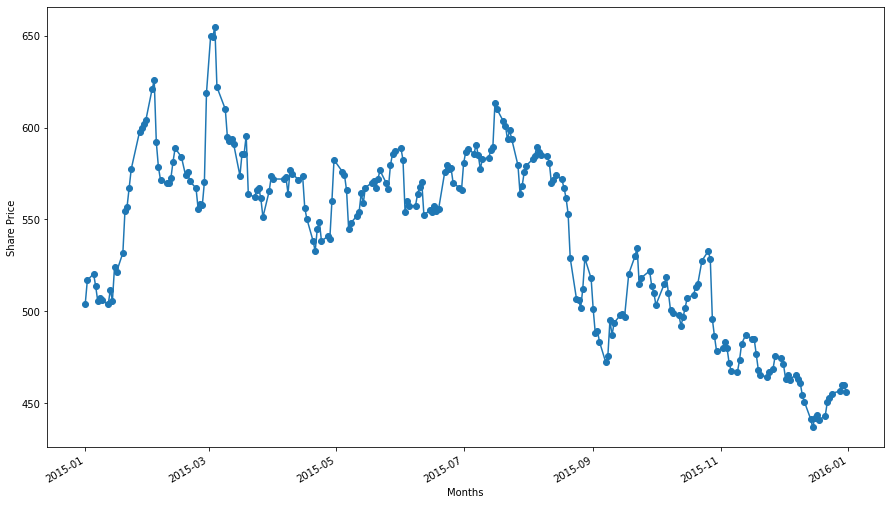

In [31]:
ax = dataset.loc['2015', 'High'].plot(figsize = (15, 9), marker="o")
ax.set_ylabel('Share Price')
ax.set_xlabel('Months')

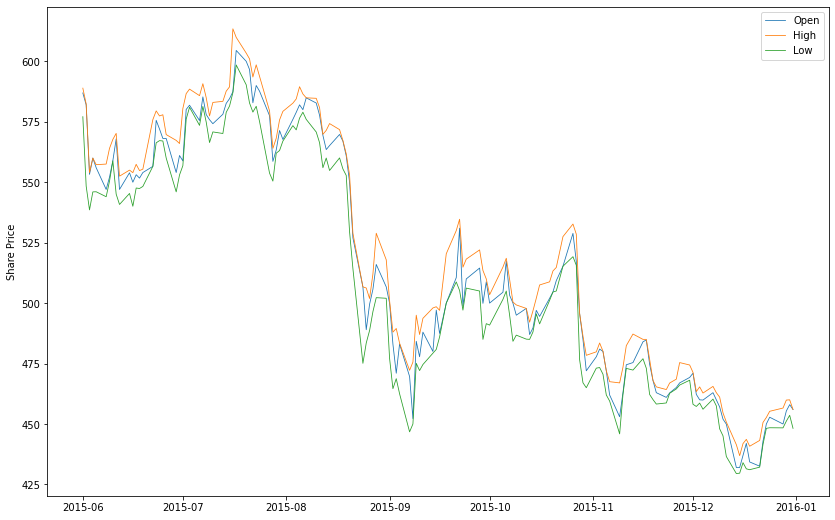

In [33]:
import matplotlib.pyplot as plt
data_columns = ['Low','High','Open']
dataset_mean = dataset[data_columns].resample('W').mean()
start, end = '2015-06', '2015-12'
fig, ax = plt.subplots(figsize=(14,9))
ax.plot(dataset.loc[start:end, 'Open'], markersize=8, linestyle='-', linewidth=0.8, label='Open')
ax.plot(dataset.loc[start:end, 'High'], markersize=8, linestyle='-', linewidth=0.8, label='High')
ax.plot(dataset.loc[start:end, 'Low'], markersize=8, linestyle='-', linewidth=0.8, label='Low')
ax.set_ylabel('Share Price')
ax.legend();

In [38]:
#DATA WRANGLING STAGE

#Checking for missing values and replacing them with median 
median_low = dataset['Low'].median()
dataset['Low'].fillna(median_low, inplace=True)

median_high = dataset['High'].median()
dataset['Low'].fillna(median_high, inplace=True)

median_close = dataset['Close'].median()
dataset['Close'].fillna(median_close, inplace=True)


#Step 1. Splitting data into independent and dependent data.
x = dataset[['Low','High', 'Month']]
y = dataset['Close']

'''
Step 2.Data Standardization
- Scaling independent variables only! No scaling performed on dependent data.
- Independent variable(Month) is categorical and is converted into numeric format using StandardScaler 
'''
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


#Step 3. Splitting data into Train and Test sets.  
#Train data size = 70% and Test data Size = 30% 
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3)

#Just to check the number of dataframes for training and testing. 
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (3567, 3)
y_train:  (3567,)
x_test:  (1530, 3)
y_test:  (1530,)


In [36]:
#MODEL TRAINING STAGE

#Creating object of class LinearRegression and is used to train and test(evaluate) the model.
linearRegression_model = LinearRegression()

# .fit() is used to train the model by providing the training data as input.
linearRegression_model.fit(x_train,y_train)

# .predict() is used for inferencing the test data.
lr_pred = linearRegression_model.predict(x_test)

In [37]:
#MODEL EVALUATION STAGE

print('Mean Absolute Error = ',metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error = ',metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Square Error = ',np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error =  5.543751142194586
Mean Squared Error =  73.8436389378794
Root Mean Square Error =  8.593232158965531
